# Lecture 27 – CSCI 3022


[Acknowledgments Page](https://ds100.org/fa23/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
from mpl_toolkits.mplot3d import Axes3D

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [2]:
# Big font helper
def adjust_fontsize(size=None):
    SMALL_SIZE = 8
    MEDIUM_SIZE = 10
    BIGGER_SIZE = 12
    if size != None:
        SMALL_SIZE = MEDIUM_SIZE = BIGGER_SIZE = size

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

<br/><br/>

---

## I). Boba Tea:  Two Constant Models, Fit to Different Losses

### Exploring MAE

In [ ]:
boba = np.array([20, 21, 22, 29, 33])

Let's plot the $L_1$ loss for a **single** observation. We'll plot the $L_1$ loss for the first observation; since $y_1 = 20$, we'll be plotting

$$
\Large
L_1(20, \theta_0) = |20 - \theta_0|
$$

In [ ]:
thetas = np.linspace(10, 30, 1000)
l1_loss_single_obvs = np.abs(boba[0] - thetas)

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

plt.plot(thetas, l1_loss_single_obvs,  'g--', );
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'L1 Loss for $y = 20$');
# plt.savefig('l1_loss_single_obs.png', bbox_inches = 'tight');

In [ ]:
def mae_constant(theta_0, data):
    return np.mean(np.array([np.abs(y_obs - theta_0) for y_obs in data]), axis=0)

thetas = np.linspace(10, 40, 1000)
l1_loss_thetas = mae_constant(thetas, boba)
plt.plot(thetas, l1_loss_thetas, color = 'green', lw=3);
plt.xlabel(r'$\theta_0$');
plt.ylabel(r'MAE across all data');
# plt.savefig('l1_loss_average.png', bbox_inches = 'tight');

### Median Minimizes MAE for the Constant Model


In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

yobs = boba
thetahat = np.median(yobs)

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.scatter([thetahat], [-.1], color='green', lw=4, label=r"$\hat{\theta}_0$");
plt.xlabel("Sales")
plt.legend()
plt.yticks([])
# plt.savefig('boba_rug.png', bbox_inches = 'tight');
plt.show()

### MSE

In [ ]:
def mse_constant(theta, data):
    return np.mean(np.array([(y_obs - theta) ** 2 for y_obs in data]), axis=0)

### Two Constant Models, Fit to Different Losses

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

nplots = 2
def plot_losses(data, title=None, theta_range=(10, 40)):
    thetas = np.linspace(theta_range[0], theta_range[1], 1000)
    l2_loss_thetas = mse_constant(thetas, data)
    thetahat_mse = np.mean(data)

    l1_loss_thetas = mae_constant(thetas, data)
    thetahat_mae = np.median(data)

    fig, axs = plt.subplots(1, nplots, figsize=(5*2+0.5, 3.5))
    axs[0].plot(thetas, l2_loss_thetas, lw=3);
    axs[0].scatter([thetahat_mse], [mse_constant(thetahat_mse, data)], s=100)
    axs[0].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mse:.1f}",
                    xy=(thetahat_mse, np.average(axs[0].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[0].set_xlabel(r'$\theta_0$');
    axs[0].set_ylabel(r'MSE');

    axs[1].plot(thetas, l1_loss_thetas, color = 'green', lw=3);
    axs[1].scatter([thetahat_mae], [mae_constant(thetahat_mae, data)], color='green', s=100)
    axs[1].annotate(r"$\hat{\theta}_0$ = " + f"{thetahat_mae:.1f}",
                    xy=(thetahat_mae, np.average(axs[1].get_ylim())),
                    size=20, ha='center', va='top',
                    bbox=dict(boxstyle='round', fc='w'))
    axs[1].set_xlabel(r'$\theta_0$');
    axs[1].set_ylabel(r'MAE');
    if title:
        fig.suptitle(title)
    fig.tight_layout()
    return fig

In [ ]:
fig = plot_losses(boba)
plt.figure(fig)
# plt.savefig('loss_compare.png', bbox_inches = 'tight');
plt.show()

#### More loss comparison: Outliers

In [ ]:
boba_outlier = np.array([20, 21, 22, 29, 33, 1033])
fig = plot_losses(boba_outlier, theta_range=[-10, 300])
plt.figure(fig)
# plt.savefig('loss_outlier.png', bbox_inches = 'tight');
plt.show()

#### Uniqueness under Different Loss Functions

In [ ]:
boba_even = np.array([20, 21, 22, 29, 33, 35])
fig = plot_losses(boba_even)
plt.figure(fig)
#plt.savefig('loss_unique.png', bbox_inches = 'tight');
plt.show()

## II).  Simple Linear Regression


### Standard Units

$$
\text{StandardUnits}(x) = \frac{x - \text{Mean}(x)}{\text{Stdev}(x)} 
$$

In [3]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

### Correlation

$$
\begin{align}
r 
& = \text{Mean}\left(\text{StandardUnits}(x) *  \text{StandardUnits}(y)\right)\\
& = \frac{1}{n} \sum_{i=1}^n \text{StandardUnits}(x_i) *  \text{StandardUnits}(y_i)\\
& = \frac{1}{n}\sum_{i=1}^n \left( \frac{x_i - \text{Mean}(x)}{\text{Stdev}(x)} \right) * \left( \frac{y_i - \text{Mean}(y)}{\text{Stdev}(y)} \right) \\
\end{align}
$$

In [4]:
def correlation(x, y):
    """Computes the correlation between arrays x and y"""
    x_su = standard_units(x)
    y_su = standard_units(y)
    return np.mean(x_su * y_su)

### Example:  Predicting children's (adult) heights from heights of their parents

Can we predict how tall a child will grow based on the height of their parents?

To do this we will use the famous Galton's height dataset (https://galton.org/essays/1880-1889/galton-1886-jaigi-regression-stature.pdf) that was collected to demonstrate the connection between parent's heights and the height of their (adult) children.  The data were collected in the late 19th century in England. He coined the term regression towards mediocrity to describe the result of his linear model. (Note that the paper was written in 1886. The “computer” mentioned in the paper was actually a person whose job was to do number crunching.) Surprisingly, Galton’s analysis is still useful today (see e.g. Predicting height: the Victorian approach beats modern genomics (https://www.wired.com/2009/03/predicting-height-the-victorian-approach-beats-modern-genomics/)

Sir Francis Galton (1822–1911) was an English statistician. He founded many concepts in statistics, such as correlation, quartile, percentile and regression, that are still being used today.

The description of the data can be found here:  https://ytliu0.github.io/Stat390EF-R-Independent-Study-archive/RMarkdownExercises/GaltonData.html

(Heights are given in inches in this table)

In [12]:
heights = pd.read_csv("data/family_heights.csv")


heights["parent ave"] = (heights["father"]+heights["mother"])/2

heights.head()

,family,father,mother,child,children,order,sex,parent ave
0,1,78.5,67.0,73.2,4,1,male,72.75
1,1,78.5,67.0,69.2,4,2,female,72.75
2,1,78.5,67.0,69.0,4,3,female,72.75
3,1,78.5,67.0,69.0,4,4,female,72.75
4,2,75.5,66.5,73.5,4,1,male,71.00


In [37]:
px.scatter(heights, x="parent ave", y="child")

In [14]:
correlation(heights["parent ave"], heights["child"])

0.32244267720033226

## Finding the "best fit" line for this data

In [60]:
guess_slope=1
guess_intercept=0

guess_slope2=-.5
guess_intercept2=100

guess_slope3= .7
guess_intercept3= 20

fig = px.scatter(heights, x="parent ave", y="child")
xtest = np.arange(62, 73, 0.5)
fig.add_scatter(x=xtest, 
                y=guess_slope * xtest + guess_intercept,
                name = f"{np.round(guess_slope, 2)} x + {np.round(guess_intercept)}")

fig.add_scatter(x=xtest, 
                y=guess_slope2 * xtest + guess_intercept2,
                name = f"{np.round(guess_slope2, 2)} x + {np.round(guess_intercept2)}")

fig.add_scatter(x=xtest, 
                y=guess_slope3 * xtest + guess_intercept3,
                name = f"{np.round(guess_slope3, 2)} x + {np.round(guess_intercept3)}")

fig

### Optimal Slope and Intercept for SLR

$$
\begin{align}
\text{slope} &= r * \frac{\text{Stdev}(y)}{\text{Stdev}(x)}\\
\text{intercept} & = \text{Mean}(y) - \text{slope} * \text{Mean}(x)
\end{align}
$$

In [5]:
def slope(x, y):
    """Computes the slope of the regression line"""
    r = correlation(x, y)
    y_sd = np.std(y)
    x_sd = np.std(x)
    return r * y_sd / x_sd

In [6]:
def intercept(x, y):
    """Computes the intercept of the regression line"""
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return y_mean - slope(x, y)*x_mean

### Linear Prediction

$$
\hat{y}_\text{predicted} = \text{slope} * x + \text{intercept}
$$


In [7]:
def predict_linear(x, y):
    """Return an array of the regressions estimates at all the x values"""
    pred_y = slope(x, y) * x + intercept(x, y)
    return pred_y

### Linear Prediction at a point not in the original model:

In [8]:
def predict_linear_new(x, y, new):
    """Return an array of the regressions estimates at all the x values"""
    pred_new = slope(x, y) * new + intercept(x, y)
    return pred_new

### Visualizing the SLR

In [9]:
def visual_SLR(x,y):
    
    yhat_pred = predict_linear(x,y)
    sns.scatterplot(x=x, y=y)
    plt.plot(x, yhat_pred, color='red', lw=4)

    plt.title("Regression Line:  y_pred = "+str(round(intercept(x,y),2))+"+"+str(round(slope(x,y),2))+"x")


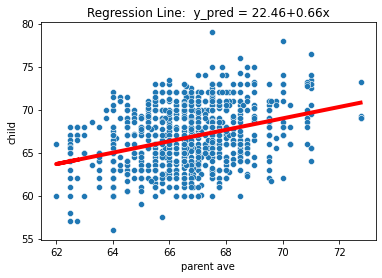

In [15]:
visual_SLR(heights["parent ave"], heights["child"])

In [16]:
predict_linear_new(heights["parent ave"], heights["child"], 70.5)

69.30875595161625

## Calculating SLR Using Built-In Python Functions:
`sklearn` is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [17]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()

# Step 2: fit the model
X = heights[["parent ave"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = heights["child"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat)**2))}")


The model intercept is 22.461839955758734
The model slope is: 0.6644952623525894
The RMSE of the model is 3.386265554285447


In [38]:
#Plotting Model Using output from Sklearn


demo_slope = my_model.coef_[0]
demo_intercept = my_model.intercept_

fig = px.scatter(heights, x="parent ave", y="child")
xtest = np.arange(62, 75, .5)
fig.add_scatter(x=xtest, 
                y=demo_slope * xtest + demo_intercept,
                name = f"{np.round(demo_slope, 2)} x + {np.round(demo_intercept)}")




In [39]:
my_model.predict([[70.5]])

/Users/maribethoscamou/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([69.30875595])

## Computing the Error (aka Residual)

The error is the difference between the actual and predicted value:

$$
\text{residual = error} = y - y_\text{predicted}
$$


In [19]:
y = heights["child"]
predicted = predict_linear(heights["parent ave"], y)

errors = y - predicted

In [41]:
heights["Residual"] = errors


In [28]:

demo_slope = slope(heights["parent ave"], heights["child"])
demo_intercept = intercept(heights["parent ave"], heights["child"])
print("Slope:", demo_slope)
print("Intercept:", demo_intercept)


fig = px.scatter(heights, x="parent ave", y="child")
xtest = np.arange(62, 75, 1)
fig.add_scatter(x=xtest, 
                y=demo_slope * xtest + demo_intercept,
                name = f"{np.round(demo_slope, 2)} x + {np.round(demo_intercept)}")
fig.add_scatter(x=heights["parent ave"].repeat(3), 
                y=np.ravel(np.vstack([y, predicted, np.nan * predicted]).T),
                marker_color="gray", line_width=0.75, name="Errors")
fig

Slope: 0.6644952623525923
Intercept: 22.461839955758492


### Plot of Residuals vs x

<br><br><br>

---
## Summarizing the Overall Error

What is the average error?

In [21]:
np.mean(errors)

5.4568769203503194e-14

Mean Absolute Error

In [22]:
np.mean(np.abs(errors))

2.8630793964633265

Mean Squared Error (MSE)

In [23]:
np.mean(errors ** 2)

11.466794404140149

Root Mean Squared Error (RMSE)

In [24]:
np.sqrt(np.mean(errors ** 2))

3.3862655542854503

<br><br>

#### Discussion Question
Assuming $y$ is in inches. What are the units of:
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error

<br><br>


<br>

---

## Error as Function of our Model (Line)

In [ ]:
def demographics_rmse(slope, intercept):
    predicted = slope * demographics.column("College%") + intercept 
    actual = demographics.column("Median Income")
    errors = predicted - actual
    rmse = np.sqrt(np.mean(errors ** 2))
    return rmse

The value of our error function for the slope and intercept we derived in last lecture is:

In [ ]:
demographics_rmse(demo_slope, demo_intercept)

What if we used a different slope and intercept value:

In [ ]:
def visualize_demographics_rmse(slope, intercept):
    rmse = demographics_rmse(slope, intercept)
    predicted = slope * demographics.column("College%") + intercept 
    actual = demographics.column("Median Income")
    fig = px.scatter(demographics.to_df(), x="College%", y="Median Income")
    xtest = np.arange(0, 75, 1)
    fig.add_scatter(x=xtest, y=slope * xtest + intercept,
                    name = f"{np.round(slope, 2)} x + {np.round(intercept)}")
    fig.add_scatter(x=demographics.column("College%").repeat(3), 
                    y=np.ravel(np.vstack([actual, predicted, np.nan * predicted]).T),
                    marker_color="gray", line_width=0.75, name="Errors")
    fig.update_layout(title=f"RMSE = {np.round(rmse, 2)}")
    return fig

In [ ]:
visualize_demographics_rmse(demo_slope, demo_intercept)

In [ ]:
visualize_demographics_rmse(demo_slope+1000, demo_intercept - 50000)

<br><br><br>

---

Varying the Slope and Intercept and Plotting the RMSE

In [ ]:
alt_slopes = demo_slope + np.arange(-20, 20)
rmses = []
for new_slope in alt_slopes:
    rmses = np.append(rmses, demographics_rmse(new_slope, demo_intercept))

variations = Table().with_columns("Slope", alt_slopes, "RMSE", rmses)

In [ ]:
fig = px.scatter(variations.to_df(), x="Slope", y="RMSE")
fig.add_scatter(x=[demo_slope], y=[demographics_rmse(demo_slope, demo_intercept)], marker_size=10, 
                name="Best Slope")

What if we tried to change the intercept value while using the best slope so far?

In [ ]:
alt_intercepts = demo_intercept + np.arange(-2000, 2000, 100)
rmses = []
for new_intercept in alt_intercepts:
    rmses = np.append(rmses, demographics_rmse(demo_slope, new_intercept))

variations = Table().with_columns("Intercept", alt_intercepts, "RMSE", rmses)
fig = px.scatter(variations.to_df(), x="Intercept", y="RMSE")
fig.add_scatter(x=[demo_intercept], y=[demographics_rmse(demo_slope, demo_intercept)], marker_size=10, 
                name="Best Intercept")

What if we tried changing both the slope and the intercept at the same time?

In [ ]:
alt_slopes = demo_slope + np.arange(-100, 100, 1)
alt_intercepts = demo_intercept + np.arange(-2000, 2000, 10)
variations = Table(["Slope", "Intercept", "RMSE"])
for new_slope in alt_slopes:
    for new_intercept in alt_intercepts:
        rmse = demographics_rmse(new_slope, new_intercept)
        variations.append([new_slope, new_intercept, rmse])
    
variations
go.Figure(data=[
    go.Contour(x=variations.column("Slope"), y=variations.column("Intercept"), z=variations.column("RMSE")), 
    go.Scatter(x=[demo_slope], y=[demo_intercept], marker_color="red")
],
layout=dict(width = 800,height=600, xaxis_title="Slope", yaxis_title="Intercept"))

In three dimensions:

In [ ]:
go.Figure(data=[
    go.Surface(x = alt_slopes, y = alt_intercepts,
               z=variations.column("RMSE").reshape(len(alt_slopes), len(alt_intercepts)).T),
    go.Scatter3d(x=[demo_slope], y=[demo_intercept], z=[demographics_rmse(demo_slope, demo_intercept)])], 
          layout=dict(height=1000, 
                      scene_xaxis_title="Slope", scene_yaxis_title="Intercept", 
                      scene_zaxis_title="RMSE"))

---
<br/>



## II).  Dugongs Part 1: Comparing Two Different Models, Both Fit with MSE

In [ ]:
dugongs = pd.read_csv("data/dugongs.csv")
data_constant = dugongs["Age"]
data_linear = dugongs[["Length", "Age"]]

### Loss Surfaces

### CONSTANT MODEL:  
Computes constant loss surface. As a reminder, the average loss of the constant model is

$$
\Large
\hat{R}(\theta_0) = \frac{1}{n}\sum_{i=1}^n (y_i - \theta_0)^2
$$

In [ ]:
plt.style.use('default') # Revert style to default mpl
adjust_fontsize(size=16)
%matplotlib inline

thetas = np.linspace(-20, 42, 1000)
l2_loss_thetas = mse_constant(thetas, data_constant)

plt.plot(thetas, l2_loss_thetas)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'MSE')

# Optimal point:  The mean:
thetahat = np.mean(data_constant)
plt.scatter([thetahat], [mse_constant(thetahat, data_constant)], s=50, label = r"$\hat{\theta}_0$")
plt.legend()
# plt.savefig('mse_constant_loss.png', bbox_inches = 'tight');
plt.show()

### Visualization of Constant Model

Here's a visualization of the prediction for the Constant Model:

In [ ]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

In [ ]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

fig = plt.figure(figsize=(8, 1.5))
sns.rugplot(yobs, height=0.25, lw=2) ;
plt.axvline(thetahat, color='red', lw=4, label=r"$\hat{\theta}_0$");
plt.legend()
plt.yticks([])
# plt.savefig('dugong_rug.png', bbox_inches = 'tight');
plt.show()
print("Constant Model:  Theta_0 =", thetahat)

### SLR MODEL:

In [ ]:
# Helper functions
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

def fit_least_squares(x, y):
    theta_0 = intercept(x, y)
    theta_1 = slope(x, y)
    return theta_0, theta_1

def predict(x, theta_0, theta_1):
    return theta_0 + theta_1*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

In [ ]:
theta_0_hat, theta_1_hat = fit_least_squares(xs,yobs)

print("SLR intercept is", theta_0_hat)
print("SLR slope is", theta_1_hat)

## Visualizing Loss Surface
Computes 3D loss surface. As a reminder, the average loss for the SLR model is

$$
\Large
\hat{R}(\theta_0, \theta_1) = \frac{1}{n}\sum_{i=1}^n (y_i - (\theta_0 + \theta_1x))^2
$$

In [ ]:
def mse_linear(theta_0, theta_1, data_linear):
    data_x, data_y = data_linear.iloc[:,0], data_linear.iloc[:,1]
    return np.mean(np.array([(y - (theta_0+theta_1*x)) ** 2 for x, y in zip(data_x, data_y)]), axis=0)

theta_0_values = np.linspace(-80, 20, 80)
theta_1_values = np.linspace(-10, 30, 80)
mse_values = np.array([[mse_linear(x,y,data_linear) for x in theta_0_values] for y in theta_1_values])


# Create the 3D plot
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(theta_0_values, theta_1_values)
surf = ax.plot_surface(X, Y, mse_values, cmap='viridis', alpha=0.6)  # Use alpha to make it slightly transparent

# Scatter point using matplotlib
sc = ax.scatter([theta_0_hat], [theta_1_hat], [mse_linear(theta_0_hat, theta_1_hat, data_linear)],
                marker='o', color='red', s=100, label='theta hat')

# Create a colorbar
cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
cbar.set_label('Cost Value')

ax.set_title('MSE for different $\\theta_0, \\theta_1$')
ax.set_xlabel('$\\theta_0$')
ax.set_ylabel('$\\theta_1$') 
ax.set_zlabel('MSE')

# plt.savefig('mse_linear_loss.png', bbox_inches = 'tight');
plt.show()



### Predictions

Code to plot the SLR:

In [ ]:
yobs = data_linear["Age"]      # The true observations y
xs = data_linear["Length"]     # Needed for linear predictions
n = len(yobs)                  # Predictions

yhats_linear = [theta_0_hat + theta_1_hat * x for x in xs]


In [ ]:

sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(theta_0_hat,2))+"+"+str(round(theta_1_hat,2))+"(Length)")




### RMSE

In [ ]:
print("Least Squares Constant Model RMSE:",
          np.sqrt(mse_constant(thetahat, data_constant)))
print("Least Squares Linear Model RMSE:  ",
          np.sqrt(mse_linear(theta_0_hat, theta_1_hat, data_linear)))

Interpret the RMSE (Root Mean Square Error):
* Constant model error is HIGHER than linear model error
* Linear model is BETTER than constant model (at least for this metric)

## Calculating SLR Using Built-In Python Functions:
`sklearn` is a popular Python library for building and fitting models. Below we walk through the general workflow for writing code for sklearn. While our examples will be focused on linear models, sklearn is highly adaptable for use on other (more complex) kinds of models. We'll see examples of this later in the semester.

In [ ]:
import sklearn.linear_model as lm

# Step 1: initialize LinearRegression model
my_model = lm.LinearRegression()


# Step 2: fit the model
X = dugongs[["Length"]]  #Needs to be a dataframe, so if only have one column include 2 brackets
y = dugongs["Age"]

my_model.fit(X, y)

# Step 3: make predictions

print("The model intercept is",my_model.intercept_)
print("The model slope is:", my_model.coef_[0])

y_hat = my_model.predict(X)

print(f"The RMSE of the model is {np.sqrt(np.mean((y-y_hat)**2))}")


In [ ]:
#Plotting Model Using output from Sklearn

xs = data_linear["Length"]     # Needed for linear predictions

yhats_linear = [my_model.intercept_ + my_model.coef_[0] * x for x in xs]

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.title("Regression Line:  Age = "+str(round(my_model.intercept_,2))+"+"+str(round(my_model.coef_[0],2))+"(Length)")




## III).  Evaluating the Simple Linear Regression Model


In [ ]:
plt.style.use('default') # Revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # Performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"\ theta_0: {ahat:.2f}, \ theta_1: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

Let's look at four different datasets. Without visualizing the data, let's try fitting the simple linear regression model to these four datasets!

In [ ]:
# Load in four different datasets: I, II, III, IV
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

anscombe = {
    'I': pd.DataFrame(list(zip(x, y1)), columns =['x', 'y']),
    'II': pd.DataFrame(list(zip(x, y2)), columns =['x', 'y']),
    'III': pd.DataFrame(list(zip(x, y3)), columns =['x', 'y']),
    'IV': pd.DataFrame(list(zip(x4, y4)), columns =['x', 'y'])
}

In [ ]:
for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    x, y = ans["x"], ans["y"]
    ahat, bhat = fit_least_squares(x, y)
    print(f"Dataset {dataset}: theta_0: {ahat:.2f}, theta_1: {bhat:.2f}")

Looks like all four datasets have exactly the same fit. 

In fact, all four of them have the same $\bar x$, $\bar y$, $\sigma_x$, $\sigma_y$, correlation $r$, and RMSE! If we only look at these statistics, we will probably be inclined to say that these datasets are similar.

In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = NO_VIZ)
    print()
    print()

However, it is only when we visualize the datasets that we realize only one of these four sets of data makes sense to model using SLR.

In [ ]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

for i, dataset in enumerate(['I', 'II', 'III', 'IV']):
    ans = anscombe[dataset]
    axs[i//2, i%2].scatter(ans['x'], ans['y'])
    axs[i//2, i%2].set_title(f"Dataset {dataset}")

plt.show()

Checking the residuals will also shed light on the differences among these four datasets.

In general the residual plot of a good regression shows no pattern.

In [ ]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize = RESID)
    plt.show(fig)
    print()
    print()

The takeaway here is that you should always visualize your datasets before fitting any models to it!

## Dugongs Part 2

### Residual Plot

In [ ]:
dugongs = pd.read_csv("data/dugongs.csv")
dugongs.head()

In [ ]:
yobs = dugongs["Age"]      # The true observations y
xs = dugongs["Length"]     # Needed for linear predictions

theta_1_hat = np.corrcoef(xs, yobs)[0, 1] * np.std(yobs) / np.std(xs)
theta_0_hat = np.mean(yobs) - theta_1_hat * np.mean(xs)
yhats_linear = theta_0_hat + theta_1_hat * xs

print("theta_1_hat:", theta_1_hat)
print("theta_0_hat:", theta_0_hat)

In [ ]:
np.corrcoef(xs, yobs)[0, 1]

## Evaluating the Model

The correlation coefficient is pretty high...but there's an issue.

Let's first plot the Dugong linear fit again. It doesn't look so bad if we see it here.

In [ ]:
# In case we're in a weird style state
sns.set_theme()
adjust_fontsize(size=16)
%matplotlib inline

sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, yhats_linear, color='red', lw=4)
# plt.savefig('dugong_line.png', bbox_inches = 'tight');
plt.show()

Let's further inspect by plotting residuals.

In [ ]:
residuals = yobs - yhats_linear

sns.scatterplot(x=xs, y=residuals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$y - \hat{y}$")
# plt.savefig('dugong_residuals.png', bbox_inches = 'tight');
plt.show()

### Log transformation of y

We could fit a line to the linear model that relates $ z = \log(y)$ to $x$:

$$ 
\Large
\hat{z} = \theta_0 + \theta_1 x
$$

In [ ]:
dugongs["Log(Age)"] = np.log(dugongs["Age"])
zobs = dugongs["Log(Age)"]      # The LOG of true observations y
xs = dugongs["Length"]     # Needed for linear predictions

ztheta_1_hat = np.corrcoef(xs, zobs)[0, 1] * np.std(zobs) / np.std(xs)
ztheta_0_hat = np.mean(zobs) - ztheta_1_hat * np.mean(xs)
zhats_linear = ztheta_0_hat + ztheta_1_hat * xs

In [ ]:
sns.scatterplot(x=xs, y=zobs, color='green')
plt.plot(xs, zhats_linear, lw=4)
# plt.savefig('dugong_zline.png', bbox_inches = 'tight');
plt.show()

In [ ]:
zresiduals = zobs - zhats_linear

sns.scatterplot(x=xs, y=zresiduals, color='red', lw=4)
plt.axhline(0, color='black')
plt.ylabel(r"$z - \hat{z}$")
# plt.savefig('dugong_zresiduals.png', bbox_inches = 'tight');
plt.show()

### Map back to the original coordinates

$$ 
\begin{align*}
\hat{z} &= \theta_0 + \theta_1 x\\
\widehat{\log(y)}&= \theta_0 + \theta_1 x\\
e^{\widehat{\log(y)}}&= e^{\theta_0 + \theta_1 x}\\
\hat{y}&=e^{\theta_0 + \theta_1 x}\
\end{align*}
$$

In [ ]:
ypred = np.exp(zhats_linear)
sns.scatterplot(x=xs, y=yobs)
plt.plot(xs, ypred, color='green', lw=4)
# plt.savefig('dugong_curve.png', bbox_inches = 'tight');
plt.show()